In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from pydataset import data
from acquire import tts

## Clustering with the Iris Dataset

* Choose features other than the ones used in the lesson. (sepal width, petal width)
* Visualize the results of your clustering.
* Use the elbow method to visually select a good value for k.
* Repeat the clustering, this time with 3 different features. (petal length, petal width, sepal width)

In [2]:
iris=data('iris')

In [3]:
train, val, test =tts(iris)

In [4]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
X = train[['Sepal.Width', 'Petal.Width']]

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)


array([1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0], dtype=int32)

In [7]:
train['width_clusters']= kmeans.predict(X)

<AxesSubplot:xlabel='Sepal.Width', ylabel='Petal.Width'>

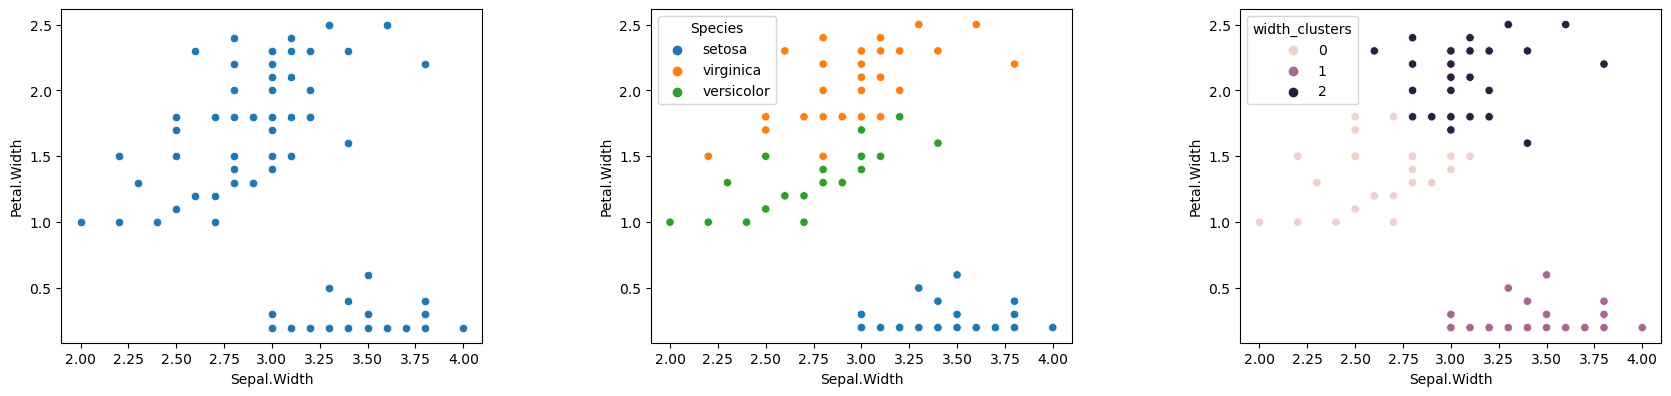

In [8]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(231)
sns.scatterplot(x='Sepal.Width', y='Petal.Width', data=train)
plt.subplot(232)
sns.scatterplot(x='Sepal.Width', y='Petal.Width', data=train, hue='Species')
plt.subplot(233)
sns.scatterplot(x='Sepal.Width', y='Petal.Width', data=train, hue='width_clusters')

In [9]:
a=list(range(1,6))
b=[]
for n in range(1,6):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    kmeans.predict(X)
    b.append(kmeans.inertia_)
inertiadf=pd.DataFrame(data=[a,b]).T
inertiadf

,0,1
0,1.0,63.788452
1,2.0,21.458333
2,3.0,10.071343
3,4.0,7.317207
4,5.0,6.005546


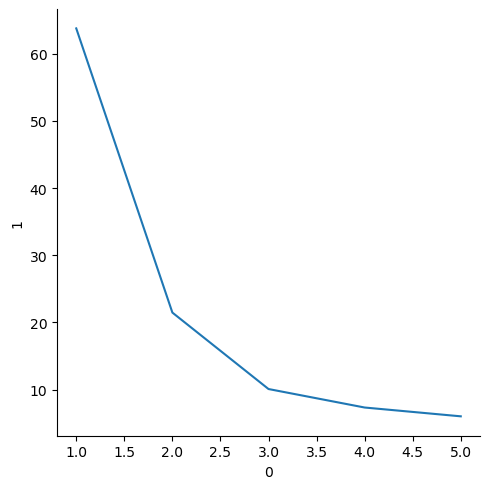

In [10]:
sns.relplot(kind='line', x= 0,y=1,data=inertiadf)

## maybe use two or three clusters

In [11]:
X = train[['Sepal.Width', 'Petal.Width', 'Petal.Length']]

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)


array([1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0], dtype=int32)

In [13]:
train['3_features']= kmeans.predict(X)

<AxesSubplot:xlabel='Sepal.Width', ylabel='Petal.Width'>

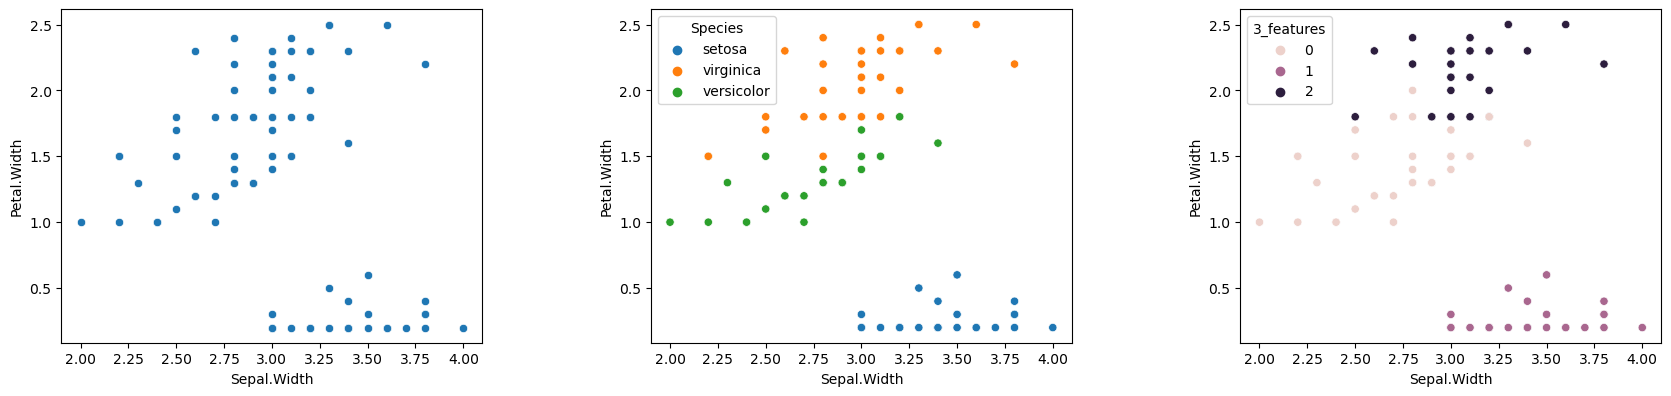

In [14]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(231)
sns.scatterplot(x='Sepal.Width', y='Petal.Width', data=train)
plt.subplot(232)
sns.scatterplot(x='Sepal.Width', y='Petal.Width', data=train, hue='Species')
plt.subplot(233)
sns.scatterplot(x='Sepal.Width', y='Petal.Width', data=train, hue='3_features')

In [15]:
a=list(range(1,6))
b=[]
for n in range(1,6):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    kmeans.predict(X)
    b.append(kmeans.inertia_)
inertiadf=pd.DataFrame(data=[a,b]).T
inertiadf

,0,1
0,1.0,317.681310
1,2.0,65.052542
2,3.0,27.743544
3,4.0,19.555961
4,5.0,15.565094


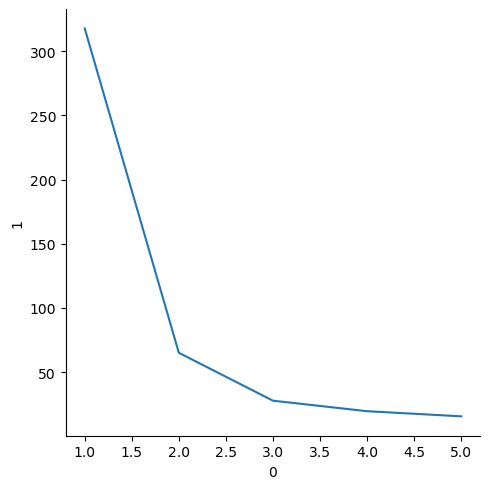

In [16]:
sns.relplot(kind='line', x= 0,y=1,data=inertiadf)

## use 2 clusters

# Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



In [17]:
from wrangle_mall import wrangle_mall_customers

In [18]:
mc= wrangle_mall_customers()

In [19]:
mc.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
train, val, test = tts(mc)

In [21]:
X=train[['age', 'annual_income']]

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)


array([3, 3, 0, 0, 0, 2, 3, 1, 2, 1, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0, 0, 3,
       0, 3, 0, 2, 0, 2, 0, 0, 1, 1, 3, 3, 0, 2, 1, 0, 0, 2, 1, 2, 2, 0,
       3, 0, 2, 3, 0, 1, 3, 3, 3, 2, 0, 3, 2, 1, 3, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 1, 3, 2, 2, 2, 3, 0, 2, 3, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2,
       3, 3, 0, 0, 1, 2, 3, 1, 1, 3, 0, 3, 3, 2, 3, 3, 0, 3, 1, 1, 0, 3,
       0, 1], dtype=int32)

In [23]:
train['age_income']=kmeans.predict(X)

<AxesSubplot:xlabel='age', ylabel='annual_income'>

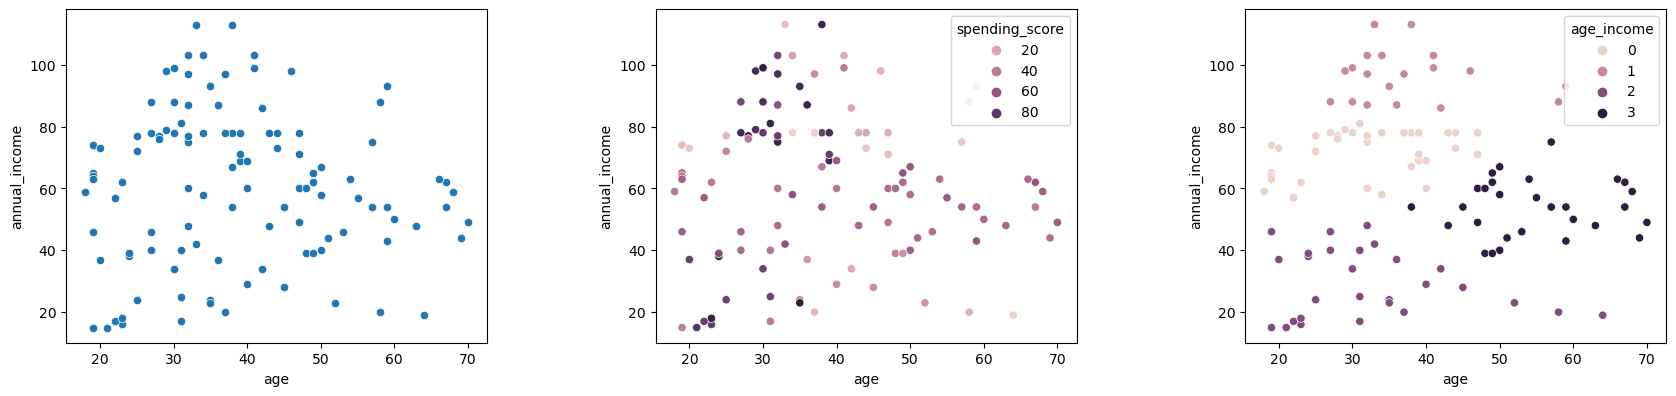

In [24]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(231)
sns.scatterplot(x='age', y='annual_income', data=train)
plt.subplot(232)
sns.scatterplot(x='age', y='annual_income', data=train, hue='spending_score')
plt.subplot(233)
sns.scatterplot(x='age', y='annual_income', data=train, hue='age_income')

In [25]:
a=list(range(1,6))
b=[]
for n in range(1,6):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    kmeans.predict(X)
    b.append(kmeans.inertia_)
inertiadf=pd.DataFrame(data=[a,b]).T
inertiadf

,0,1
0,1.0,86810.776786
1,2.0,40969.417972
2,3.0,25864.023695
3,4.0,18272.377871
4,5.0,15142.697927


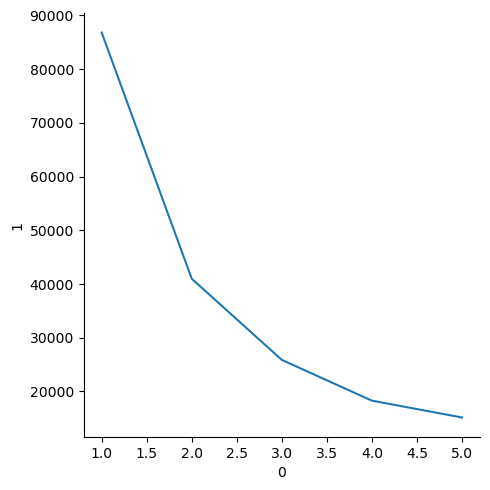

In [26]:
sns.relplot(kind='line', x= 0,y=1,data=inertiadf)

## use 2 features

# How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise)

In [27]:
train, val, test = tts(mc)

In [28]:
from wrangle_mall import scale_mall

In [29]:
train_s=scale_mall(train)

In [30]:
X=train[['age', 'annual_income']]

In [31]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)


array([3, 3, 2, 1, 2, 0, 2, 1, 0, 1, 1, 2, 3, 3, 1, 3, 2, 3, 2, 2, 1, 3,
       1, 3, 1, 0, 2, 0, 1, 2, 1, 1, 3, 3, 2, 0, 1, 2, 2, 0, 1, 3, 0, 2,
       3, 2, 0, 3, 2, 1, 3, 3, 3, 0, 2, 3, 3, 1, 3, 0, 1, 0, 0, 1, 1, 0,
       2, 2, 1, 3, 0, 0, 0, 3, 2, 0, 3, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       3, 3, 1, 2, 1, 0, 3, 1, 1, 3, 1, 3, 3, 0, 3, 3, 2, 3, 1, 1, 2, 3,
       2, 1], dtype=int32)

In [32]:
train['age_income']=kmeans.predict(X)

<AxesSubplot:xlabel='age', ylabel='annual_income'>

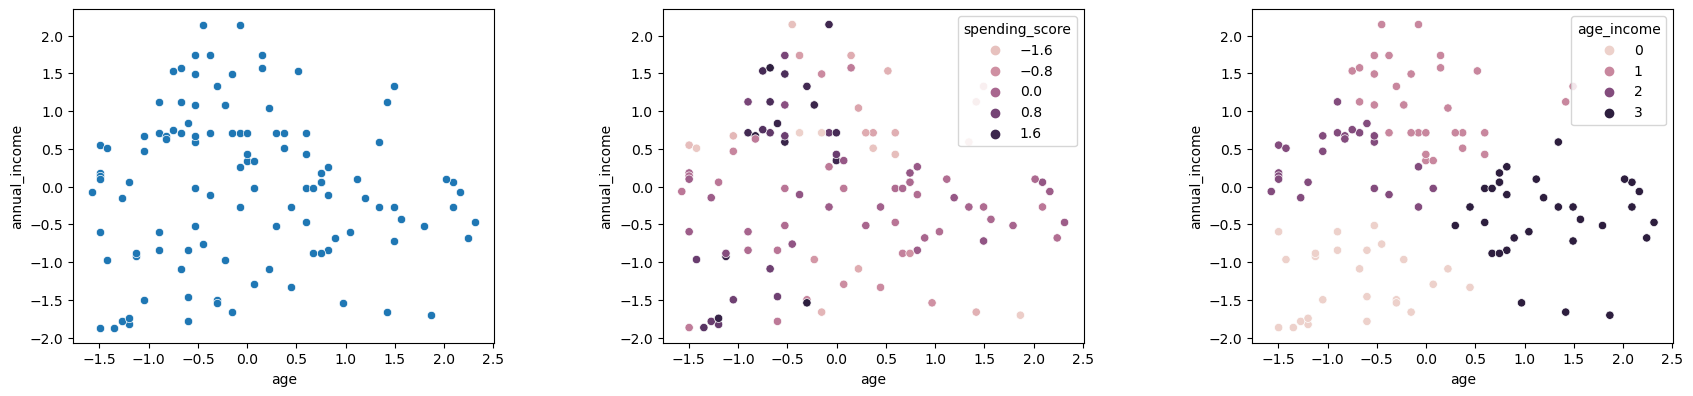

In [33]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(231)
sns.scatterplot(x='age', y='annual_income', data=train)
plt.subplot(232)
sns.scatterplot(x='age', y='annual_income', data=train, hue='spending_score')
plt.subplot(233)
sns.scatterplot(x='age', y='annual_income', data=train, hue='age_income')

In [34]:
a=list(range(1,6))
b=[]
for n in range(1,6):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    kmeans.predict(X)
    b.append(kmeans.inertia_)
inertiadf=pd.DataFrame(data=[a,b]).T
inertiadf

,0,1
0,1.0,224.000000
1,2.0,138.023236
2,3.0,72.749047
3,4.0,57.779324
4,5.0,44.440027


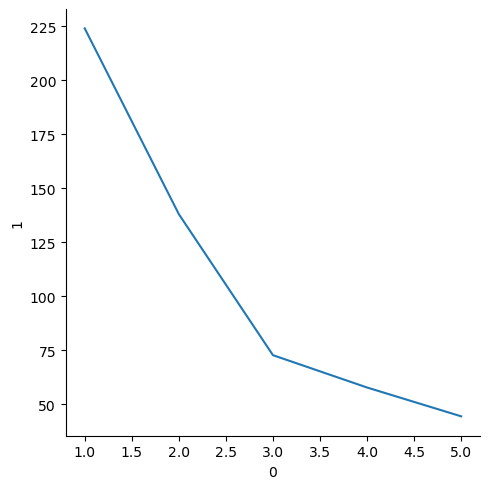

In [35]:
sns.relplot(kind='line', x= 0,y=1,data=inertiadf)

## With scaled data, compared to the unscaled above this example, the number of clusters based on inertia looks like 3 instead of 2